1-Importing Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


2-Data Loading

In [ ]:
TRAIN_ROOT = "/content/drive/MyDrive/MRI-Data/Training"
TEST_ROOT = "/content/drive/MyDrive/MRI-Data/Testing"

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_ROOT,
    image_size=(255, 255),  # Resize images
    batch_size=22,
    label_mode='int'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_ROOT,
    image_size=(255, 255),
    batch_size=22,
    label_mode='int',
)

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [ ]:
for images, labels in test_dataset:
    print("Batch size:", images.shape[0])

Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 22
Batch size: 20


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(255, 255, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(4, activation='softmax')(x)  # 4 output classes

# Final model with the VGG16 base and custom layers
model = models.Model(inputs=base_model.input, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<Functional name=functional, built=True>

In [ ]:
class GradCamAttention(layers.Layer):
    def call(self, feature_maps, gradcam_heatmap):
        # Convert gradcam_heatmap to a tensor if it's not already
        gradcam_heatmap = tf.convert_to_tensor(gradcam_heatmap)

        # Expand dimensions of the heatmap to match feature map dimensions
        gradcam_heatmap = tf.expand_dims(gradcam_heatmap, axis=-1)  # Shape: (H, W, 1)


        # Resize the Grad-CAM heatmap to match the feature map dimensions
        gradcam_heatmap_resized = tf.image.resize(gradcam_heatmap, (feature_maps.shape[1], feature_maps.shape[2]))


        # Element-wise multiplication of feature maps and heatmap to focus on important regions
        attention_feature_maps = feature_maps * gradcam_heatmap_resized

        return attention_feature_maps


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/MRI90_75A.h5',custom_objects={'GradCamAttention': GradCamAttention})


In [ ]:
#model.save('/content/drive/MyDrive/my_model.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 255, 255, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 127, 127, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 127, 127, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 63, 63, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 31, 31, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 21,138,500 (80.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
test_batch = next(iter(test_dataset))
inputs, labels = test_batch[0], test_batch[1]
print(test_batch)
# Make predictions
predictions = model.predict(inputs)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Compare the predicted labels to the true labels
comparison = pd.DataFrame({
    'labels': labels.numpy(),
    'outputs': predicted_labels
})
accuracy = (comparison['labels'] == comparison['outputs']).sum() / len(comparison)
print("Batch accuracy: ", accuracy)
comparison

(<tf.Tensor: shape=(22, 255, 255, 3), dtype=float32, numpy=
array([[[[1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         ...,
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01]],

        [[1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         ...,
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01]],

        [[1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         [1.50000000e+01, 1.50000000e+01, 1.50000000e+01],
         ...,
         

,labels,outputs
0,2,2
1,1,2
2,2,2
3,1,0
4,0,2
5,1,2
6,1,2
7,2,2
8,0,2
9,2,2


In [ ]:
def argmaxD(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to compute Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pre=predictions[0].numpy()
            pred_index = argmaxD(pre[0])
            print(pred_index)
        class_channel = predictions[0][:, pred_index]

    # Calculate gradients of the class output value with respect to the feature map
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute the guided gradients (positive gradients)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Reshape pooled_grads to [1, 1, 512] so it can be broadcasted over conv_outputs
    pooled_grads = tf.reshape(pooled_grads, (1, 1, -1))

    # Multiply each channel in the feature map array by "how important this channel is" with respect to the target class
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs * pooled_grads

    # Compute the heatmap by averaging over all channels
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU activation to keep only positive values
    heatmap = heatmap / np.max(heatmap)  # Normalize between 0 and 1

    return heatmap

# Function to display the heatmap on the image
def display_gradcam(img, heatmap, alpha=0.4):
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = plt.cm.get_cmap("jet")

    # Create an image with RGB colors
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with the same shape as the original
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display the result
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()



3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


<ipython-input-17-e393025d45d6>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("jet")


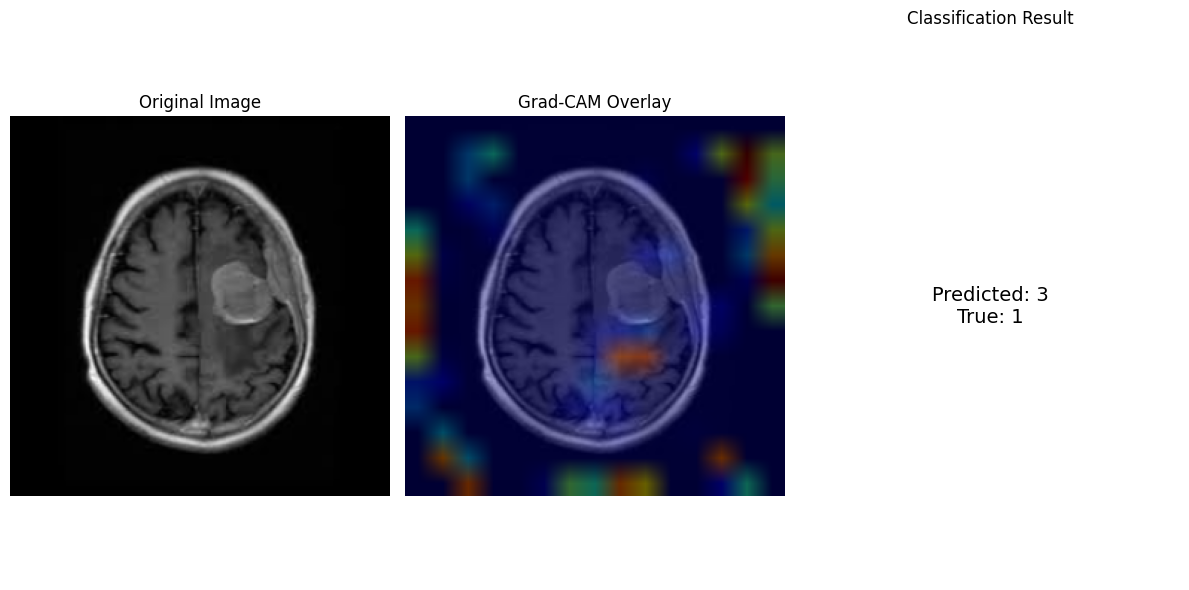

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Function to normalize and rescale image for display
def rescale_image(image):
    image = image - np.min(image)  # Min normalization
    image = image / np.max(image)  # Max normalization
    image = (image * 255).astype(np.uint8)  # Scale to 0-255
    return image

# Function to apply colormap and overlay heatmap on the original image
def overlay_heatmap(img, heatmap, alpha=0.4):
    # Rescale heatmap to range 0-1
    heatmap = np.maximum(heatmap, 0)
    heatmap = heatmap / np.max(heatmap)

    # Use a color map to convert the heatmap to a colored image
    colormap = cm.get_cmap("jet")
    heatmap_colored = colormap(heatmap)  # Shape will be (H, W, 4)
    heatmap_colored = np.delete(heatmap_colored, 3, axis=-1)  # Remove the alpha channel

    # Rescale image to be in 0-255 range for display
    img_rescaled = rescale_image(img)

    # Resize heatmap to the size of the original image
    heatmap_resized = tf.image.resize(heatmap_colored, (img_rescaled.shape[0], img_rescaled.shape[1])).numpy()

    # Apply the heatmap over the image
    overlay_img = img_rescaled * (1 - alpha) + heatmap_resized * 255 * alpha
    overlay_img = np.clip(overlay_img, 0, 255).astype(np.uint8)

    return overlay_img

# Get one batch of images and labels
test_batch = next(iter(test_dataset))
img_array, true_label = test_batch[0], test_batch[1]

# Preprocess the image (use only the first image from the batch)
img_array = img_array[:1]  # Use one image

# The name of the last convolutional layer (VGG16 specific)
last_conv_layer_name = "block5_conv3"

# Generate Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Get the model's prediction for this image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Display the results: original image, Grad-CAM image, and classification result
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Show the original image
ax[0].imshow(rescale_image(img_array[0].numpy()))
ax[0].set_title("Original Image")
ax[0].axis("off")

# Show the image with Grad-CAM heatmap overlay
gradcam_overlay = overlay_heatmap(img_array[0].numpy(), heatmap)
ax[1].imshow(gradcam_overlay)
ax[1].set_title("Grad-CAM Overlay")
ax[1].axis("off")

# Display the classification result
ax[2].text(0.5, 0.5, f"Predicted: {predicted_class[0]}\nTrue: {true_label[0]}",
           fontsize=14, ha='center', va='center', transform=ax[2].transAxes)
ax[2].set_title("Classification Result")
ax[2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
for images, labels in test_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (22, 255, 255, 3)
Label batch shape: (22,)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


17/18 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.2791 - loss: 1.3897

InvalidArgumentError: Graph execution error:

Detected at node model_2959_1/grad_cam_attention_89_1/mul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-19-e0c34e5e320a>", line 4, in <cell line: 4>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 429, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 154, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 82, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "<ipython-input-15-81989c565d0e>", line 18, in call

Incompatible shapes: [20,7,7,512] vs. [22,7,7,1]
	 [[{{node model_2959_1/grad_cam_attention_89_1/mul}}]] [Op:__inference_one_step_on_iterator_2743]

In [ ]:


# Create a list to store results for all batches
total_loss = []
total_accuracy = []
total_samples = 0
batch_size_required = 22  # Batch size your model expects

# Evaluate each batch separately
for batch in test_dataset:
    inputs, labels = batch
    batch_size = inputs.shape[0]

    # Handle last partial batch
    if batch_size != batch_size_required:
        print(f"Evaluating last partial batch of size {batch_size}, padding to {batch_size_required}")

        # Pad the input and labels to the required batch size
        padding_size = batch_size_required - batch_size
        padded_inputs = tf.pad(inputs, [[0, padding_size], [0, 0], [0, 0], [0, 0]], mode='CONSTANT')
        padded_labels = tf.pad(labels, [[0, padding_size]], mode='CONSTANT')

        # Make predictions on the padded batch
        predictions = model.predict(padded_inputs)

        # Unpad the predictions to exclude the extra padded data
        predictions = predictions[:batch_size]
        predicted_labels = np.argmax(predictions, axis=1)

        # Calculate accuracy manually for the unpadded batch
        accuracy = np.mean(predicted_labels == labels.numpy())
        print(f"Partial Batch Accuracy: {accuracy}")

        # Calculate loss manually for the last batch
        loss = model.compiled_loss(labels, predictions).numpy()

        total_loss.append(loss * batch_size)
        total_accuracy.append(accuracy * batch_size)
        total_samples += batch_size
    else:
        # For full-sized batches, use model.evaluate
        loss, accuracy = model.evaluate(tf.data.Dataset.from_tensors((inputs, labels)), verbose=0)

        total_loss.append(loss * batch_size)
        total_accuracy.append(accuracy * batch_size)
        total_samples += batch_size

# Compute overall metrics
final_loss = np.sum(total_loss) / total_samples
final_accuracy = np.sum(total_accuracy) / total_samples

# Print the overall results
print(f"Test Loss: {final_loss}")
print(f"Test Accuracy: {final_accuracy}")


Evaluating last partial batch of size 20, padding to 22
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Partial Batch Accuracy: 0.2


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:607: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


Test Loss: 1.3928918402812203
Test Accuracy: 0.23350254389537772
